
# Kowshik P 

## ML Clustering assignment submitted on 02-May-2022
## -----------------------------------------------------------------------------
## Model Implemented - Agglomerative and Random Forest
## Metric - Confusion Matrix (Accuracy_score)
## Accuracy Rate of Model : 0.99
## Type - 1 error: 0
## Type - 2 error: 1 
## Performance - Good
## -----------------------------------------------------------------------------


In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as mat;


In [2]:
clientInformation = pd.read_csv("Mall_Customers.csv");

clientInformation

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
clientData = clientInformation.iloc[:,[3, 4]].values;

#clientData

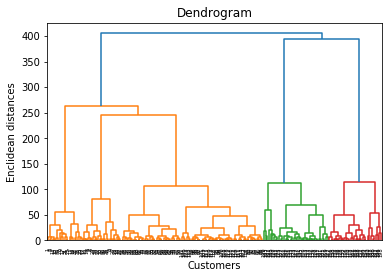

In [4]:
from sklearn.cluster import AgglomerativeClustering;

import scipy.cluster.hierarchy as sch;

sch.dendrogram(sch.linkage(clientData, method = "ward"))

#list1 = [];

for listValues in range(1, 11):
    agglo = AgglomerativeClustering(n_clusters = listValues);
    agglo.fit(clientData);
    #list1.append(agglo.inertia_);
mat.title("Dendrogram");
mat.xlabel("Customers");
mat.ylabel("Enclidean distances");
mat.show()
    



In [5]:
#from sklearn.cluster import AgglomerativeClustering;

clusterModel = AgglomerativeClustering(n_clusters = 5);

aggoLabel = clusterModel.fit_predict(clientData);
 
aggoLabel

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [6]:
supervised = pd.DataFrame(clientInformation);

supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
supervised["Cluster_group"] = aggoLabel;

supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


C:\Users\hp\Anaconda3\envs\virtualml\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


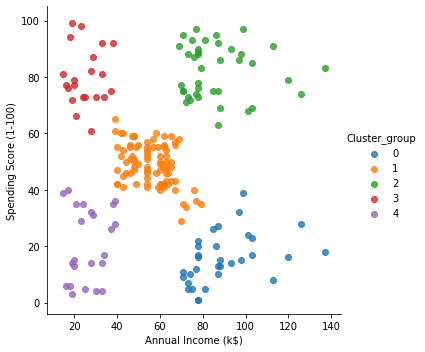

In [8]:
import seaborn as sns;

facet = sns.lmplot(data = supervised, x = supervised.columns[3], y = supervised.columns[4], hue = supervised.columns[5], 
          fit_reg = False, legend = True, legend_out = True);

In [9]:
dependent = supervised.iloc[:, [5]].values;


In [10]:
from sklearn.model_selection import train_test_split;

x_train, x_test, y_train, y_test = train_test_split(clientData, dependent, test_size = 1/3, random_state = 6);

In [11]:
from sklearn.preprocessing import StandardScaler;

standardization = StandardScaler();

x_train = standardization.fit_transform(x_train);

x_test = standardization.transform(x_test);


In [12]:
from sklearn.ensemble import RandomForestClassifier;

randomForestClassifier = RandomForestClassifier();

randomForestClassifier.fit(x_train, y_train);


C:\Users\hp\Anaconda3\envs\virtualml\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [13]:
y_pred = randomForestClassifier.predict(x_test);

In [14]:
from sklearn.metrics import confusion_matrix;

randamForestConfusionMatrix = confusion_matrix(y_test, y_pred);

print(randamForestConfusionMatrix);

[[10  0  0  0  0]
 [ 0 33  0  0  0]
 [ 0  0  9  0  0]
 [ 0  1  0  5  0]
 [ 0  0  0  0  9]]


In [15]:
from sklearn.metrics import classification_report;

randamForestClassifierReport = classification_report(y_test, y_pred);

print(randamForestClassifierReport);

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.97      1.00      0.99        33
           2       1.00      1.00      1.00         9
           3       1.00      0.83      0.91         6
           4       1.00      1.00      1.00         9

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



# Metric(Accuracy Score)
## The best performance is 1

In [16]:
from sklearn.metrics import accuracy_score;

RandomForestClassifierAccuracy = accuracy_score(y_test, y_pred);

print(RandomForestClassifierAccuracy)

0.9850746268656716
